In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('Train_bigmart_sales.csv')
test = pd.read_csv('Test_bigmart_sales.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
idsunique = len(set(train.Item_Identifier))
idsunique

1559

In [7]:
idstotal = train.shape[0]
idstotal

8523

In [8]:
idsduplicate = idstotal-idsunique

idsduplicate

6964

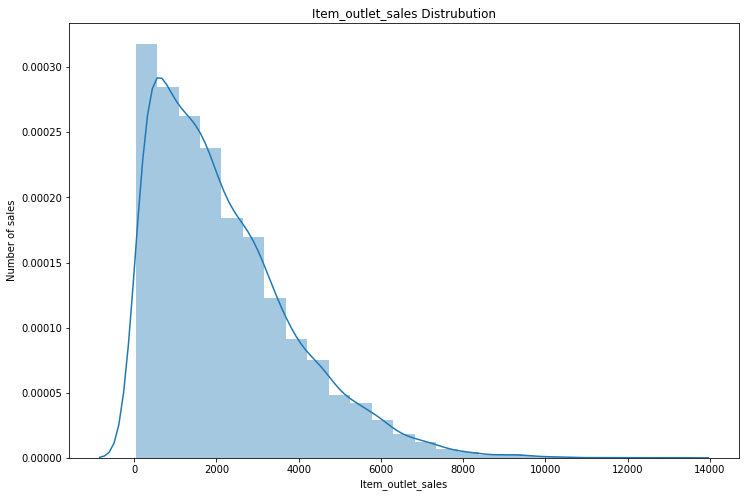

In [9]:
plt.figure(figsize = (12,8))
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style = 'plain',axis = 'x', scilimits=(0,1))
plt.xlabel('Item_outlet_sales')
plt.ylabel('Number of sales')
plt.title('Item_outlet_sales Distrubution')
plt.show()

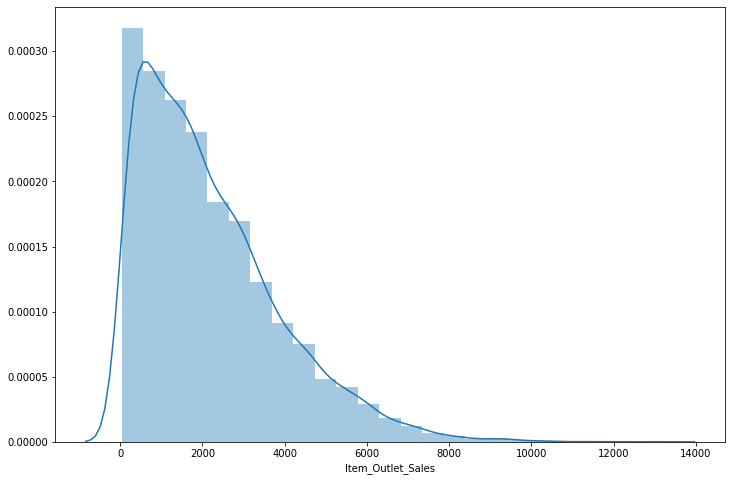

In [10]:
plt.figure(figsize = (12,8))
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style = 'plain',axis = 'x', scilimits=(0,1))

In [11]:
print('Skew is :',train.Item_Outlet_Sales.skew())

print('Kurtosis is :', train.Item_Outlet_Sales.kurt())

Skew is : 1.1775306028542798
Kurtosis is : 1.6158766814287264


In [12]:
numeric_features = train.select_dtypes(include = np.number)

In [13]:
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [14]:
numeric_features.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [15]:
corr = numeric_features.corr()

print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


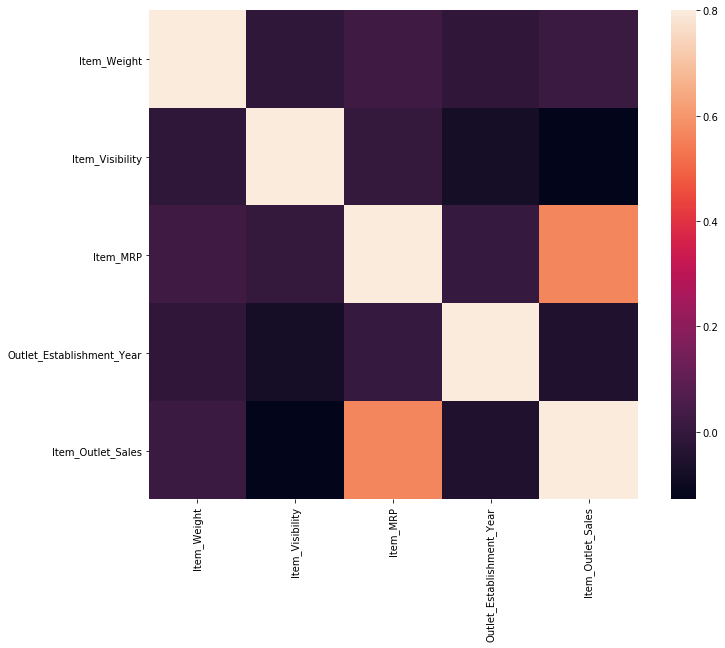

In [16]:
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax = 0.8, square =True)
plt.show()

In [17]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

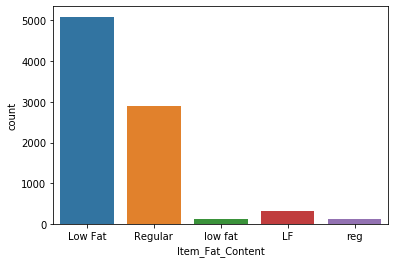

In [18]:
sns.countplot(train.Item_Fat_Content)
plt.show()

In [19]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

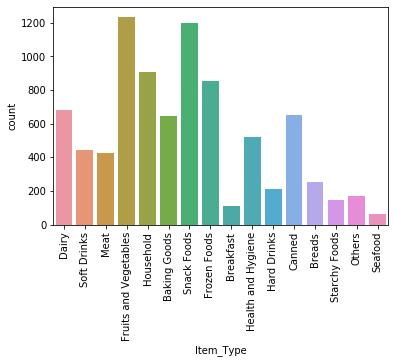

In [20]:
sns.countplot(train.Item_Type)
plt.xticks(rotation = 90)

In [21]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

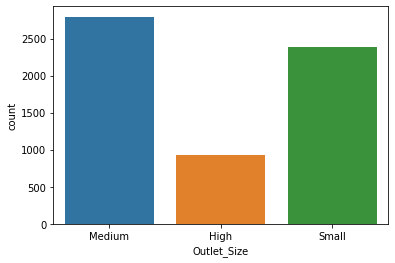

In [22]:
sns.countplot(train.Outlet_Size)
plt.show()

In [23]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

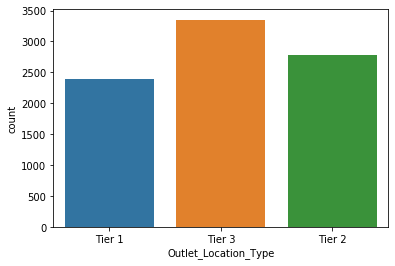

In [24]:
sns.countplot(train.Outlet_Location_Type)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

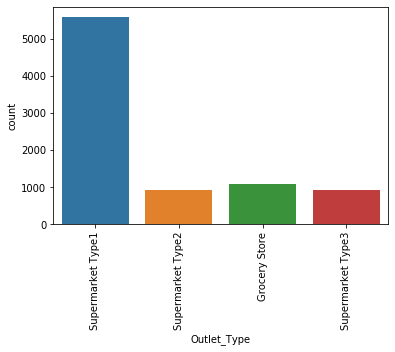

In [25]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation = 90)

Text(0, 0.5, 'Item Outlet sales')

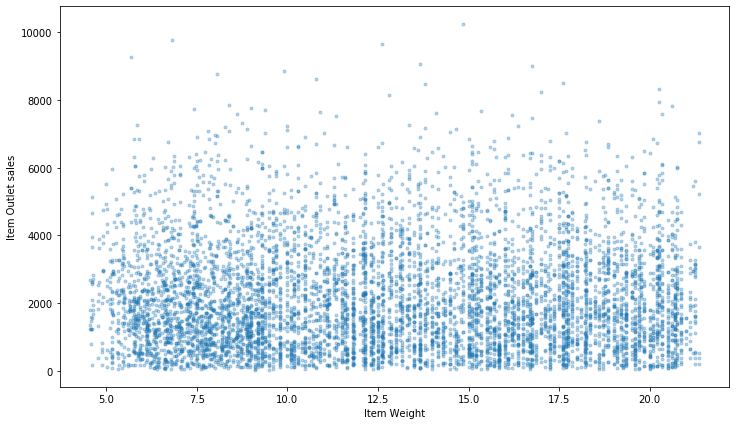

In [26]:
plt.figure(figsize = (12,7))
plt.plot(train.Item_Weight, train.Item_Outlet_Sales,'.',alpha = 0.3)
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet sales')

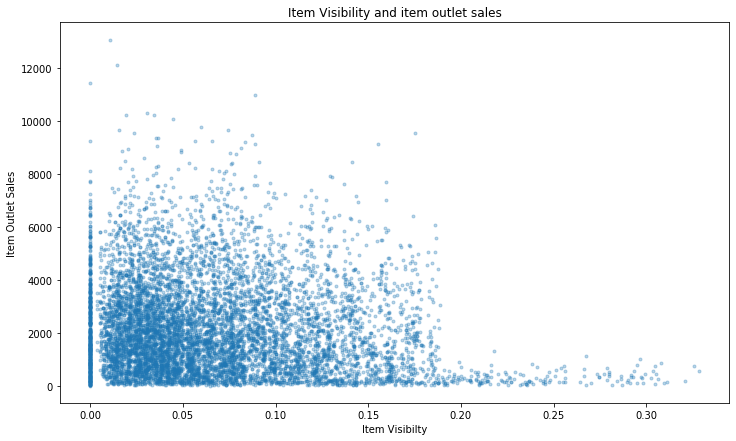

In [27]:
# Item visibilty and item outlet analysis
plt.figure(figsize = (12,7))
plt.plot(train.Item_Visibility, train.Item_Outlet_Sales, '.', alpha = 0.3)
plt.xlabel('Item Visibilty')
plt.ylabel('Item Outlet Sales')
plt.title('Item Visibility and item outlet sales')
plt.show()

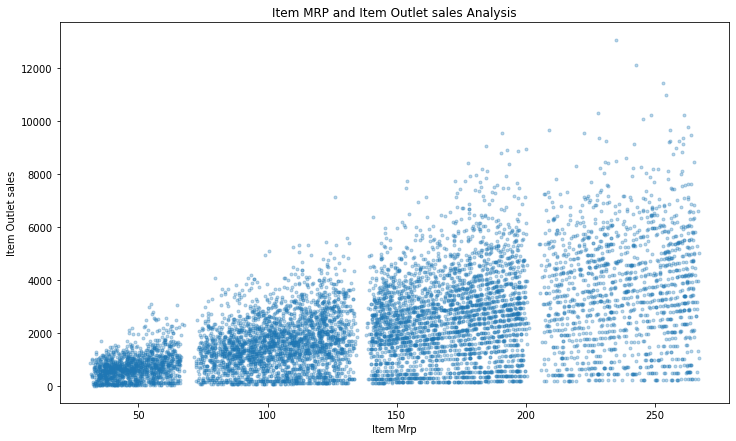

In [28]:
# item MRP and Item Outlet Sales Analysis

plt.figure(figsize = (12,7))

plt.xlabel('Item Mrp')
plt.ylabel('Item Outlet sales')
plt.title('Item MRP and Item Outlet sales Analysis')
plt.plot(train.Item_MRP, train.Item_Outlet_Sales, '.',alpha = 0.3)

Text(0.5, 1.0, 'Outsales vs establishment year')

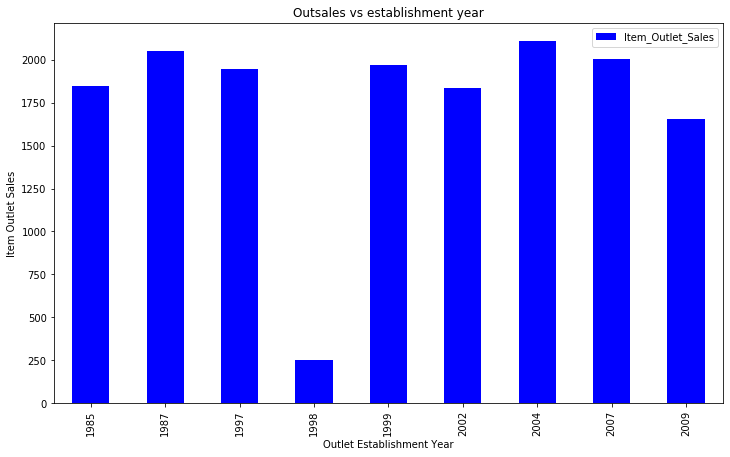

In [29]:
establishment_year_pivot = train.pivot_table(index = 'Outlet_Establishment_Year', values = 'Item_Outlet_Sales', aggfunc= np.median)

establishment_year_pivot.plot(kind = 'bar', color = 'blue', figsize = (12,7))
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales')
plt.title('Outsales vs establishment year')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

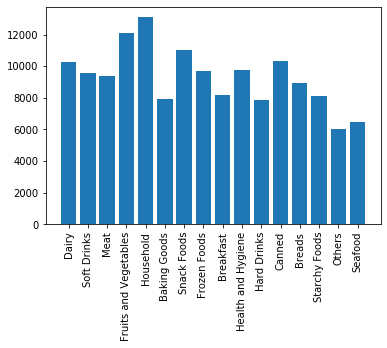

In [30]:
#Item Type vs Item outlet sales
plt.bar(train.Item_Type, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)

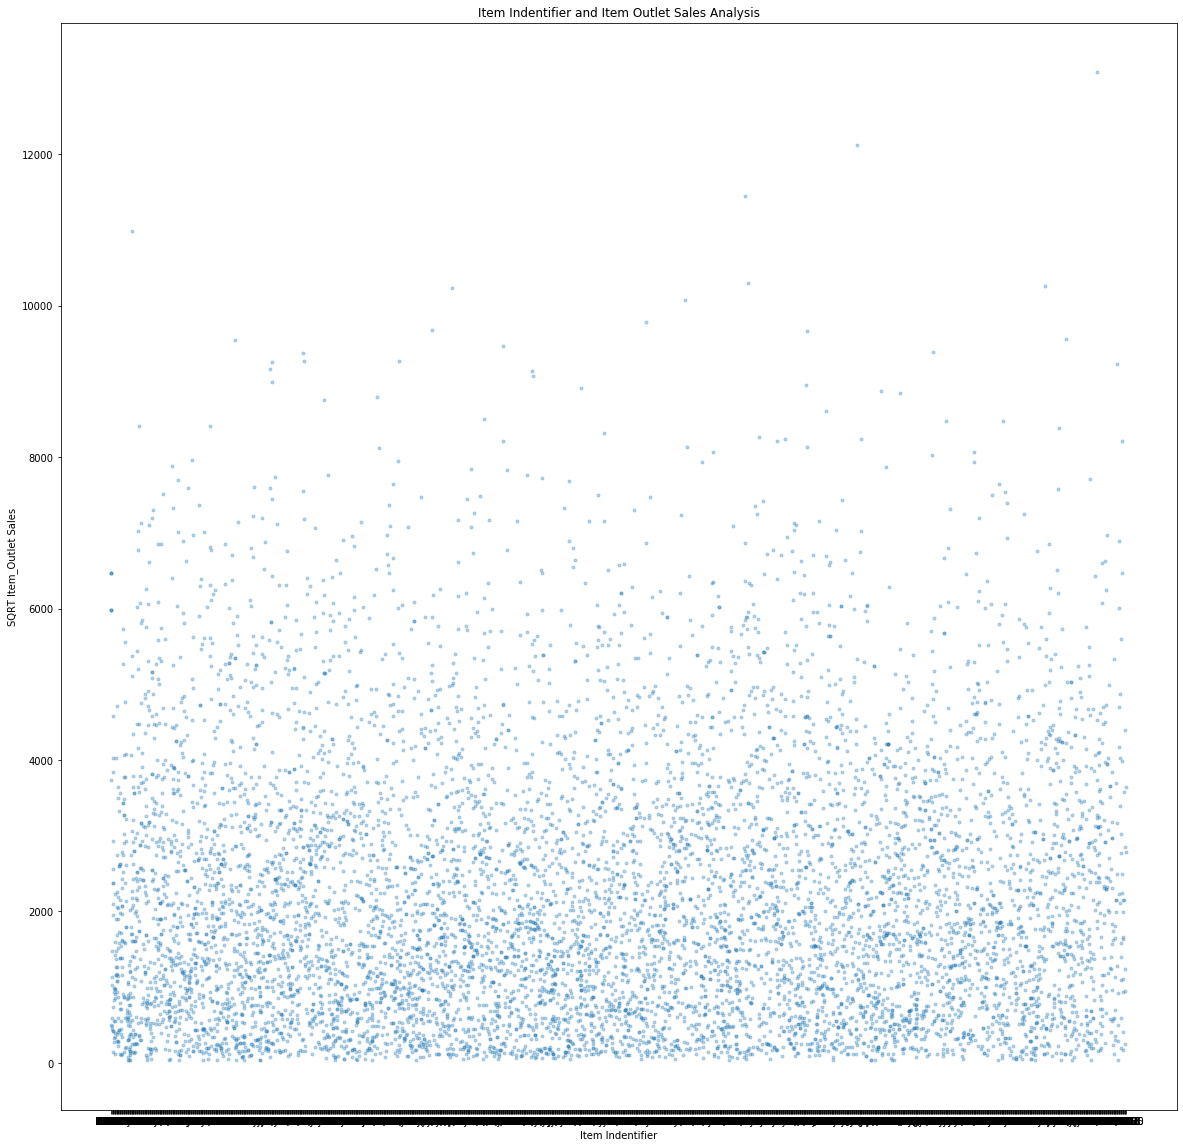

In [31]:
plt.figure(figsize = (20,20))
plt.xlabel('Item Indentifier')
plt.ylabel('SQRT Item_Outlet Sales')
plt.title('Item Indentifier and Item Outlet Sales Analysis')
plt.plot(train.Item_Identifier, train.Item_Outlet_Sales, '.',alpha = 0.3)
plt.show()

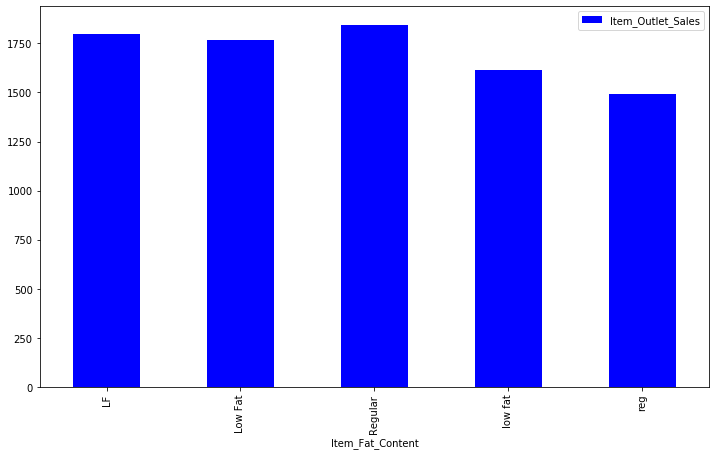

In [32]:
item_fat = train.pivot_table(index = 'Item_Fat_Content', values = 'Item_Outlet_Sales',aggfunc = np.median)
item_fat.plot(kind = 'bar', color = 'blue', figsize = (12,7))
plt.show()

In [33]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier', aggfunc= lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [34]:
# impact of item fat content on item outlet sales

group1 = train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].median()

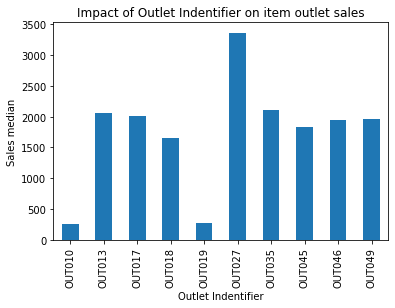

In [35]:
group1.plot(kind = 'bar')
plt.xlabel('Outlet Indentifier')
plt.ylabel('Sales median')
plt.title('Impact of Outlet Indentifier on item outlet sales')
plt.xticks(rotation = 90)
plt.show()

In [36]:
train.groupby('Outlet_Identifier')['Outlet_Type'].apply(lambda x : x.mode())

Outlet_Identifier   
OUT010             0        Grocery Store
OUT013             0    Supermarket Type1
OUT017             0    Supermarket Type1
OUT018             0    Supermarket Type2
OUT019             0        Grocery Store
OUT027             0    Supermarket Type3
OUT035             0    Supermarket Type1
OUT045             0    Supermarket Type1
OUT046             0    Supermarket Type1
OUT049             0    Supermarket Type1
Name: Outlet_Type, dtype: object

In [37]:
train.pivot_table(values ='Outlet_Type',columns ='Outlet_Identifier', aggfunc = lambda x : x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [38]:
train.pivot_table(values = 'Outlet_Type',columns = 'Outlet_Size', aggfunc= lambda x : x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


In [39]:
outlet_size_sales = train.pivot_table(index = 'Outlet_Size', values = 'Item_Outlet_Sales', aggfunc='median')

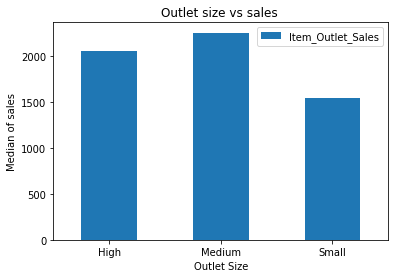

In [40]:
outlet_size_sales.plot(kind = 'bar')
plt.xlabel('Outlet Size')
plt.ylabel('Median of sales')
plt.title('Outlet size vs sales ')
plt.xticks(rotation = 0)
plt.show()

In [41]:
train.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

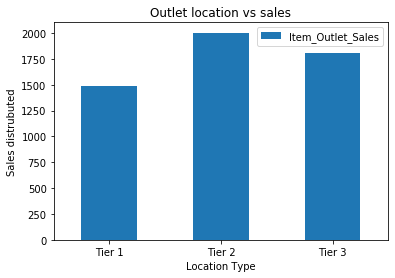

In [42]:
train.pivot_table(index = 'Outlet_Location_Type', values = 'Item_Outlet_Sales', aggfunc = 'median').plot(kind='bar')
plt.xticks(rotation = 0)
plt.xlabel('Location Type')
plt.ylabel('Sales distrubuted')
plt.title('Outlet location vs sales')
plt.show()

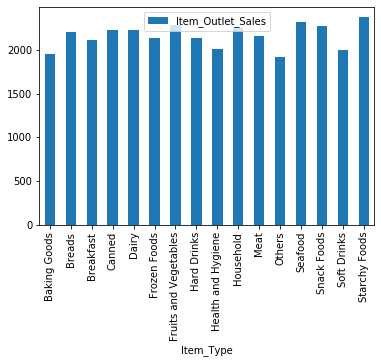

In [43]:
train.pivot_table(index = 'Item_Type', values = 'Item_Outlet_Sales', aggfunc = 'mean').plot(kind= 'bar')
plt.show()

In [44]:
data = pd.concat([train,test], ignore_index=True)

In [45]:
data.to_csv('combined_dat.csv',index=False)

In [46]:
print(train.shape,test.shape,data.shape)

(8523, 12) (5681, 11) (14204, 12)


In [47]:
item_avg_weight = data.pivot_table(values = 'Item_Weight', index ='Item_Identifier')

In [48]:
print(item_avg_weight.head())

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115


In [49]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [50]:
def avg(cols):
    weight = cols[0]
    identifier = cols[1]
    if pd.isnull(weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == identifier]
    else:
        return weight

In [51]:
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(avg,axis=1).astype(float)

In [52]:
print(data['Item_Weight'].isnull().sum())

0


In [53]:
data.isnull().sum()/14204*100

Item_Fat_Content              0.000000
Item_Identifier               0.000000
Item_MRP                      0.000000
Item_Outlet_Sales            39.995776
Item_Type                     0.000000
Item_Visibility               0.000000
Item_Weight                   0.000000
Outlet_Establishment_Year     0.000000
Outlet_Identifier             0.000000
Outlet_Location_Type          0.000000
Outlet_Size                  28.273726
Outlet_Type                   0.000000
dtype: float64

In [54]:
data.shape

(14204, 12)

In [55]:
outlet_size_mode = data.pivot_table(values = 'Outlet_Size',index= 'Outlet_Type', aggfunc=lambda x: x.mode())

In [56]:
outlet_size_mode

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [57]:
def mod(col):
    size = col[0]
    outlet_typ = col[1]
    if pd.isnull(size):
        return outlet_size_mode['Outlet_Size'][outlet_size_mode.index == outlet_typ]
    else:
        return outlet_typ

In [58]:
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(mod,axis=1)

In [59]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
dtype: int64

In [60]:
data.pivot_table(values = 'Item_Outlet_Sales', index = 'Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [61]:
data['Item_Visibility'].value_counts()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [62]:
visibility_item_avg= data.pivot_table(index = 'Item_Identifier', values = 'Item_Visibility')
visibility_item_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [63]:
def vis2(col):
    visible = col[0]
    Indentifier = col[1]
    if visible == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == Indentifier]
    else:
        return visible

In [64]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Supermarket Type1,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Supermarket Type2,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Supermarket Type1,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,[Small],Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,Supermarket Type1,Supermarket Type1


In [65]:
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(vis2,axis=1).astype(float)

In [66]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Supermarket Type1,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Supermarket Type2,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Supermarket Type1,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,[Small],Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,Supermarket Type1,Supermarket Type1


In [67]:
data ['Outlet_Years'] = 2013-data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [68]:
data.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [69]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x : x[0:2])

In [70]:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR':'Drinks'})

In [71]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [72]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [73]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','LF':'Low Fat', 'low fat':'Low Fat'})

In [74]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [75]:
data['Item_Fat_Content'].isnull().sum()

0

In [76]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [77]:
data.loc[data['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content'] = 'Non-Edible'

In [78]:
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [79]:
data.loc[data['Item_Type_Combined']=='Non-Consumable']

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Outlet_Years,Item_Type_Combined
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,Supermarket Type1,Supermarket Type1,26,Non-Consumable
16,Non-Edible,NCB42,115.3492,1621.8888,Health and Hygiene,0.008596,11.80,2009,OUT018,Tier 3,Supermarket Type2,Supermarket Type2,4,Non-Consumable
22,Non-Edible,NCB30,196.5084,1587.2672,Household,0.025698,14.60,2004,OUT035,Tier 2,Supermarket Type1,Supermarket Type1,9,Non-Consumable
25,Non-Edible,NCD06,45.9060,838.9080,Household,0.099887,13.00,2007,OUT017,Tier 2,[Small],Supermarket Type1,6,Non-Consumable
31,Non-Edible,NCS17,96.4436,2741.7644,Health and Hygiene,0.080829,18.60,2009,OUT018,Tier 3,Supermarket Type2,Supermarket Type2,4,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14162,Non-Edible,NCN26,116.9808,NaN,Household,0.028842,10.85,2007,OUT017,Tier 2,[Small],Supermarket Type1,6,Non-Consumable
14164,Non-Edible,NCI43,49.8376,NaN,Household,0.026009,19.85,1999,OUT049,Tier 1,Supermarket Type1,Supermarket Type1,14,Non-Consumable
14165,Non-Edible,NCL17,143.0812,NaN,Health and Hygiene,0.067885,7.39,1999,OUT049,Tier 1,Supermarket Type1,Supermarket Type1,14,Non-Consumable
14195,Non-Edible,NCH42,231.1010,NaN,Household,0.036594,6.86,1999,OUT049,Tier 1,Supermarket Type1,Supermarket Type1,14,Non-Consumable


In [80]:
data['Item_Visibility'].describe()

count    14204.000000
mean         0.069710
std          0.049728
min          0.003575
25%          0.031145
50%          0.057194
75%          0.096930
max          0.328391
Name: Item_Visibility, dtype: float64

In [81]:
func = lambda x: x['Item_Visibility']/visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]
data['Item_visibility_mean'] = data.apply(func,axis=1).astype(float)
data['Item_visibility_mean'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_visibility_mean, dtype: float64

In [82]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

In [83]:
data['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [84]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Outlet_Years,Item_Type_Combined,Item_visibility_mean,Outlet
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Supermarket Type1,Supermarket Type1,14,Food,0.931078,9
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Supermarket Type2,Supermarket Type2,4,Drinks,0.933420,3
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Supermarket Type1,Supermarket Type1,14,Food,0.960069,9
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,[Small],Grocery Store,15,Food,1.000000,0
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,Supermarket Type1,Supermarket Type1,26,Non-Consumable,1.000000,1


In [85]:
data['Outlet_Size'] = data['Outlet_Size'].apply(lambda x : ''.join(map(str,x)))
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']

In [86]:
for i in var_mod:
    print(i)
    data[i] = le.fit_transform(data[i])

Item_Fat_Content
Outlet_Location_Type
Outlet_Size
Item_Type_Combined
Outlet_Type
Outlet


In [87]:
# dummy variables:
data = pd.get_dummies(data, columns = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [88]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Years                   int64
Item_visibility_mean         float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Size_3                  uint8
Outlet_Size_4                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
I

In [89]:
data.columns

Index(['Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Type',
       'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year',
       'Outlet_Identifier', 'Outlet_Years', 'Item_visibility_mean',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'Outlet_Size_3', 'Outlet_Size_4', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3',
       'Item_Type_Combined_0', 'Item_Type_Combined_1', 'Item_Type_Combined_2',
       'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5',
       'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9'],
      dtype='object')

In [90]:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [92]:
data.to_csv('u1.csv')

In [93]:
data['Item_Outlet_Sales']

0        3735.1380
1         443.4228
2        2097.2700
3         732.3800
4         994.7052
           ...    
14199          NaN
14200          NaN
14201          NaN
14202          NaN
14203          NaN
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [94]:
np.NaN

nan

In [95]:
train = data[0:8523]

In [96]:
test = data[8523:]

In [97]:
test.drop(['Item_Outlet_Sales'],axis=1,inplace = True)

In [99]:
train.to_csv('train_modified1.csv', index = False)
test.to_csv('test_modified1.csv',index = False)

In [100]:
train_df = pd.read_csv('train_modified1.csv')
test_df = pd.read_csv('test_modified1.csv')

In [101]:
# Define target and ID Columns

target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn import metrics

def modelfit(alg,dtrain,dtest, predictors, target, IDcol,filename):
    #fitting the algorthim on the data
    alg.fit(dtrain[predictors],dtrain[target])
    
    #predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #perform cross-validation:
    
    cv_score = cross_val_score(alg,dtrain[predictors], dtrain[target], cv = 20, scoring = 'neg_mean_squared_error')
    
    cv_score = np.sqrt(np.abs(cv_score))
    
    print('\nModel Report')
    print('RMSE: %.4g'%np.sqrt(metrics.mean_squared_error((dtrain[target]),dtrain_predictions )))
    print('CV Score: Mean - %.4g| std - %.4g | Min - %.4g | Max - %.4g'% (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))
    
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index = False)


Model Report
RMSE: 1128
CV Score: Mean - 1129| std - 43.3 | Min - 1075 | Max - 1211


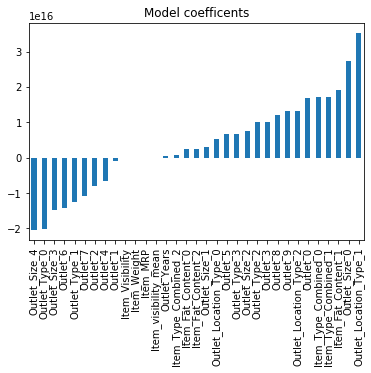

In [102]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(normalize=True)

predictors = train_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])

modelfit(LR,train_df,test_df,predictors,target,IDcol,'LR.csv')

coef1 = pd.Series(LR.coef_, predictors).sort_values()

coef1.plot(kind = 'bar', title = 'Model coefficents')
plt.show()


Model Report
RMSE: 1129
CV Score: Mean - 1130| std - 44.73 | Min - 1076 | Max - 1217


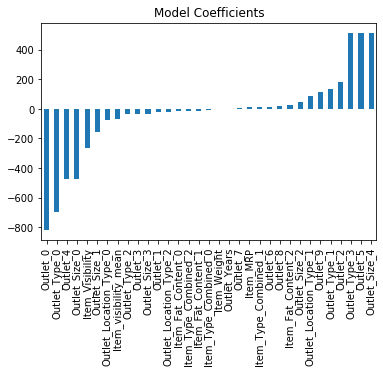

In [103]:
from sklearn.linear_model import Ridge

RR = Ridge(alpha = 0.05, normalize = True)

modelfit(RR,train_df,test_df,predictors,target,IDcol,'RR.csv')

coef2 = pd.Series(RR.coef_, predictors).sort_values()

coef2.plot(kind = 'bar', title = 'Model Coefficients')


Model Report
RMSE: 1058
CV Score: Mean - 1092| std - 46.11 | Min - 1004 | Max - 1188


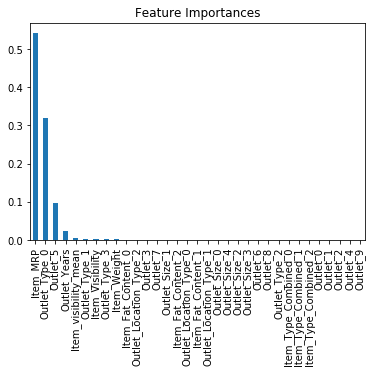

In [104]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf = 100)

modelfit(DT,train_df,test_df,predictors,target,IDcol,'DT.csv')

coef3 = pd.Series(DT.feature_importances_,predictors).sort_values(ascending=False)

coef3.plot(kind = 'bar', title = 'Feature Importances')
plt.show()


Model Report
RMSE: 1068
CV Score: Mean - 1097| std - 43.97 | Min - 1025 | Max - 1181


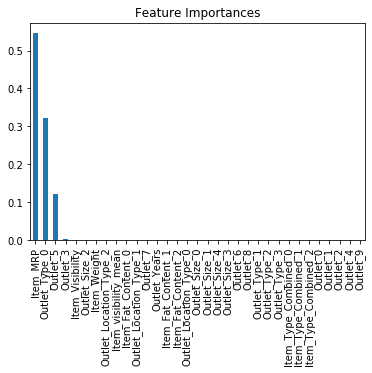

In [105]:
RF = DecisionTreeRegressor(max_depth=8,min_samples_leaf=150)

modelfit(RF,train_df,test_df,predictors,target,IDcol,'RF.csv')

coef4 = pd.Series(RF.feature_importances_,predictors).sort_values(ascending=False)
coef4.plot(kind = 'bar', title = 'Feature Importances')

In [110]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000,learning_rate=0.05)

my_model.fit(train_df[predictors], train_df[target],early_stopping_rounds=5,eval_set = [(test_df[predictors], test_df[target])], verbose =False)

[19:21:29] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [111]:
train_df_predictions = my_model.predict(train_df[predictors])

predictions = my_model.predict(test_df[predictors])

In [114]:
from sklearn.metrics import mean_absolute_error

print('Mean Absolute Error'+str(mean_absolute_error(predictions, test_df[target])))

print('RMSE: %.4g' % np.sqrt(metrics.mean_squared_error(train[target], train_df_predictions)))

Mean Absolute Error136.1646426572296
RMSE: 1054


In [116]:
IDcol.append(target)
submission = pd.DataFrame({ x: test_df[x] for x in IDcol})
submission.to_csv("XGboost.csv", index=False)